# Lab \#6: K-Nearest Neighbors Part II
---

### **Description**:
Today's lab is broken into the following parts:
<br>

#### **Part 0: Import sklearn**: This is the main imports. Run this before doing anything else.

<br>

#### **Part 1: Will it Rain Today?**: We will try to predict whether it will rain on a given day in Australia using KNN with `K = 1`.

<br>

#### **Part 2: Feature Selection**: We will see how to use variance and correlation to determine the best features to use for KNN. 

<br>

#### **Part 3: Model Evaluation**: We will see how to use evaluation metrics from `sklearn` to determine the quality of our models.

<br>

#### **Part 4: Finding the Optimal Value of K**: We will compare multiple values of K and see how to search over many values of K using an `sklearn` function called `CVGridSearch`.

<br>

#### **[OPTIONAL] Part 5: Real or Fake Money?**: This is an optional section where you can put all of this together to try to create an optimal KNN model that predicts if a banknote (paper money) is real or fake.

<br><br>

### **Cheat Sheet**: [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1RqB0neapANsdy3Mku-AGHTpgQUbm2ZDt5hq2z1sMWpo/edit?usp=sharing)


<br>

**REMEMBER: the goal is to start getting familiar some of the tools available to you. Try not to get overwhelmed with the small details and just focus on understanding the general process we follow. This is still the first of many models that you will learn to use.**

## **Part 0: Import sklearn**
---

**Run the code below before continuing.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

## **Part 1: Will it Rain Today?**
---

Our goal in this part is to create a KNN model using `K = 1` to predict the class **`RainToday`**, which says whether it will rain on a given day (`RainToday = 1`) or not (`RainToday = 0`).

### **Step #1: Load in data**
---

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQgXRAZvBDRckm_Ll_LGXM7NTSHgBmoZA93QUDI6PBP37gMtq98ZNEE6PNf-WwUx1SGWT0diVo8JgGb/pub?gid=23834121&single=true&output=csv"
rainfall_df = pd.read_csv(url)

rainfall_df.head()

,Location,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
0,Albury,20,71,10.077,16.9,0,0
1,Albury,4,44,10.106,17.2,0,0
2,Albury,7,82,10.108,17.8,0,0
3,Albury,19,55,10.092,20.6,0,0
4,Albury,6,48,10.134,16.3,0,0


### **Step #2: Decide our variables**
---

Let's visualize the relationship between `RainToday` and two variables that we will use in this section: `WindSpeed` and `Temp`.

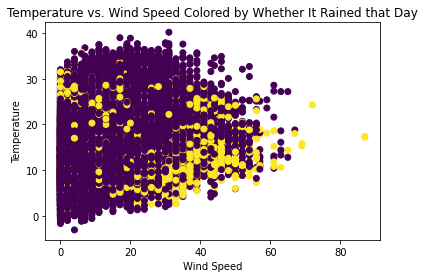

In [ ]:
plt.scatter(rainfall_df["WindSpeed"], rainfall_df["Temp"], c = rainfall_df["RainToday"])

plt.title("Temperature vs. Wind Speed Colored by Whether It Rained that Day")
plt.xlabel("Wind Speed")
plt.ylabel("Temperature")

plt.show()

### **Step #3: Split data into training and testing sets**
---

In [ ]:
inputs = rainfall_df[["WindSpeed", "Temp"]]
output = rainfall_df[["RainToday"]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output)

#### **Scaling data**
As we saw in lecture, it's important to scale our data. Run the code below to do this.

**NOTE**: It is very important that we scale based on just the training data. This keeps any information accidentally being shared about the testing data that the model could use to show an artificially higher performance.

In [ ]:
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

### **Step #4: Import our model from sklearn**
---

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize your model**
---

Remember to set the *hyperparameter* `n_neighbors`! For now, let's use `K = 1`. Later today we will see how to test a range of K values.

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

### **Step \#6: Fit your model on the training data**
---

In [ ]:
model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

### **Step \#7: Test your model**
---

Use your model to make predictions for the test data and then visualize this using the code provided below.

In [ ]:
predictions = model.predict(X_test)

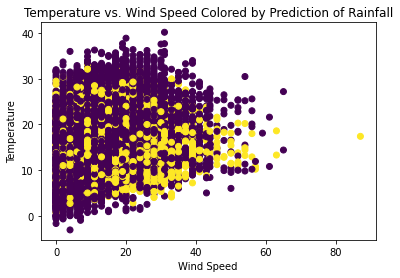

In [ ]:
# Visualizing our predictions for now, but we will see how to more quantitatively
# determine the quality of our predictions

plt.scatter(X_test['WindSpeed'], X_test['Temp'], c = predictions)

plt.title("Temperature vs. Wind Speed Colored by Prediction of Rainfall")
plt.xlabel("Wind Speed")
plt.ylabel("Temperature")
plt.show()

### **Step \#8: Apply your model**
---

Let's apply this model to entirely new points. NOTE: We will have to scale these inputs the same way as the training/testing data for the model to work properly.

1. `WindSpeed = 17` and `Temp = 23`

In [ ]:
new_day = pd.DataFrame([[17,23]], columns = ["WindSpeed", "Temp"])
new_day = (new_day - mu)/sig

pred = model.predict(new_day)

print(pred)

[0]


2. `WindSpeed = 17` and `Temp = 6`

In [ ]:
new_day = pd.DataFrame([[17,6]], columns = ["WindSpeed", "Temp"])
new_day = (new_day - mu)/sig

pred = model.predict(new_day)

print(pred)

[0]


3. `WindSpeed = 2` and `Temp = -1`

In [ ]:
new_day = pd.DataFrame([[2,1]], columns = ["WindSpeed", "Temp"])
new_day = (new_day - mu)/sig

pred = model.predict(new_day)

print(pred)

[0]


## **Part 2: Feature Selection**
---

Let's apply what we've learned about Feature Selection to determine the best features to use based on their variance and correlations.

### **Exercise 1: Decide our variables using Variance and Correlation**
---

Use the pandas DataFrame functions for variance and correlation to decide on the best features to use.

In [ ]:
# Look at the variance of each feature to see which ones might reveal interesting patterns

# COMPLETE THIS CODE
rainfall_df.var()

#highest variance is humidity, so this would be good to look at since there's many diff values
#pressure has lowest variance, meanng values are all pretty similar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


WindSpeed        77.940143
Humidity        361.028614
Pressure          0.005044
Temp             41.179571
RainToday         0.172660
RainTomorrow      0.173894
dtype: float64

In [ ]:
# Look at the correlation between features to see which ones might be redundant

# COMPLETE THIS CODE
rainfall_df.corr()

,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
WindSpeed,1.000000,-0.272017,-0.227232,0.144335,0.102628,0.093666
Humidity,-0.272017,1.000000,0.142736,-0.479410,0.354287,0.259341
Pressure,-0.227232,0.142736,1.000000,-0.423879,-0.187356,-0.246989
Temp,0.144335,-0.479410,-0.423879,1.000000,-0.096078,-0.025192
RainToday,0.102628,0.354287,-0.187356,-0.096078,1.000000,0.306378
RainTomorrow,0.093666,0.259341,-0.246989,-0.025192,0.306378,1.000000


### **Exercise 2: Decide our variables using Variance and Correlation**
---

We have provided some data below for you to examine. Using the variation and correlation along with the principle of limiting the number of features, determine the best combination of features to use.

**Run the code below first to create the dataset.**

In [ ]:
data = {}
data["Feature 1"] = [x/10 for x in range(1000)]
data["Feature 2"] = [(x % 4)/8 for x in range(1000)]
data["Feature 3"] = [(-1)**x/(x + 1)*110 for x in range(1000)]
data["Feature 4"] = [(x % 4)**3/2 for x in range(1000)]
data["Class Variable"] = [(x % 2) for x in range(1000)]


df = pd.DataFrame(data)

In [ ]:
# Look at the variance of each feature to see which ones might reveal interesting patterns

# COMPLETE THIS CODE

df.var()

Feature 1         834.166667
Feature 2           0.019551
Feature 3          19.905709
Feature 4          29.404404
Class Variable      0.250250
dtype: float64

In [ ]:
# Look at the correlation between features to see which ones might be redundant

# COMPLETE THIS CODE
df.corr()

#we would NOT want to use Feature 2, because it has a low variance, and
#the correlation with other features are high, which we don't want to 
#measure since it is strongly correlated (or similar) to the other features 

,Feature 1,Feature 2,Feature 3,Feature 4,Class Variable
Feature 1,1.000000,0.003873,-0.029623,0.003515,0.001732
Feature 2,0.003873,1.000000,-0.092258,0.907651,0.447214
Feature 3,-0.029623,-0.092258,1.000000,-0.082077,-0.184646
Feature 4,0.003515,0.907651,-0.082077,1.000000,0.461266
Class Variable,0.001732,0.447214,-0.184646,0.461266,1.000000


## **Part 3: Model Evaluation**
---

Let's determine the accuracy and confusion matrix for the KNN model you trained in Part 1 on rainfall data.

### **Exercise #1: Accuracy Score**
---

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, predictions)

0.6702668646775573

### **Exercise #2: Confusion Matrix**
---

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


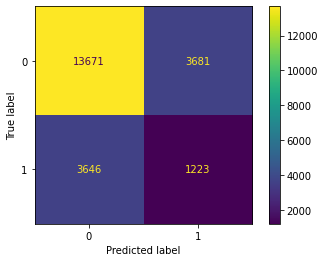

In [ ]:
metrics.plot_confusion_matrix(model, X_test, y_test)

## **Part 4: Finding the Optimal Value of K**
---

### **Exercise #1: Compare to a different K value**
---

Let's create a new model with K = 3. Then evaluate the model using two evaluation metrics: accuracy and a confusion matrix.

In [ ]:
model = # COMPLETE THIS LINE
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
# COMPLETE THIS LINE TO OUTPUT THE ACCURACY

In [ ]:
# COMPLETE THIS CODE TO OUTPUT THE CONFUSION MATRIX

How does this compare to the performance for the model we used in Part 3? Which model is better?

### **Exercise #2: Try different K values to see what is best**
---

Create and evaluate KNN models for differen K values using accuracy and the confusion matrix.

#### 1. **K = 5**

In [ ]:
# Fit the model with K = 5

In [ ]:
# Make predictions and check the accuracy

In [ ]:
# Check the confusion matrix

#### 2. **K = 9**

In [ ]:
# Fit the model with K = 5

In [ ]:
# Make predictions and check the accuracy

In [ ]:
# Check the confusion matrix

#### 3. **K = size of dataset**

In [ ]:
# Fit the model with K = size of dataset
k = len(X_train)

# COMPLETE THIS CODE

In [ ]:
# Make predictions and check the accuracy

In [ ]:
# Check the confusion matrix

#### 4. **K = $\sqrt{\text{size of dataset}}$**

In [ ]:
# Fit the model with K = sqrt(size of dataset)
k = int(len(X_train)**(1/2))

# COMPLETE THIS CODE

In [ ]:
# Make predictions and check the accuracy

In [ ]:
# Check the confusion matrix

### **Exercise #3: Using `CVGridSearch` to search over many K values**
---

Let's create a range of models to conduct a more exhuastive search for the optimal value of K using the code provided below.

#### **Part 1: Search over many K values**
---

Run the code below to determine the performance of KNN for many K values. **You are not responsible for knowing this code for now, but it is valuable to see another option in action.**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining range of ks
ks = list(range(1, 30, 4))
param_grid = dict(n_neighbors=ks)


# creating grid searcher for KNN Classifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid)
  

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)


# looking at the scores for this range
print(grid_search.cv_results_['mean_test_score'])


# looking at the best k value
print(grid_search.best_params_)

# plotting results
plt.scatter(ks, grid_search.cv_results_['mean_test_score'])

plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

#### **Part 2: Implement the best model**
---

Using the best K value found above, create a KNN model. Then look at its accuracy and confusion matrix. Compare to the previous results.

In [ ]:
# Fit the model with the best value of K

In [ ]:
# Make predictions and check the accuracy

In [ ]:
# Check the confusion matrix

---

# © 2022 The Coding School, All rights reserved